In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style="darkgrid")
import scipy as sp
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from datetime import datetime
import shap

In [186]:
exec(open("../../header.py").read())

# Import data

In [224]:
X = pd.read_csv(processed_root('cervical_cancer_risks/X.csv'))
y = pd.read_csv(processed_root('cervical_cancer_risks/y.csv'))

In [225]:
X['STDs:molluscum contagiosum'].value_counts()

0.000000    752
0.001328    105
1.000000      1
Name: STDs:molluscum contagiosum, dtype: int64

# Fit model

In [188]:
model = RandomForestClassifier(n_estimators = 500, random_state = 20)
model.fit(X, y['Biopsy'])

RandomForestClassifier(n_estimators=500, random_state=20)

# Comparison

In [189]:
exec(open("../../header.py").read())

In [190]:
shapley = SHAP_FI("tree")
native = Native_FI()
ice = ICE("binary")
pfi = PFI_FI(y)

fi_metrics = [ice, native, shapley, pfi]

In [191]:
comparator = Comparator(trace = True)

In [192]:
comparator.fit(X, model, fi_metrics)

Fitting for <__main__.ICE object at 0x00000212F37705B0>
Fitting for <__main__.Native_FI object at 0x00000212F3770B20>
Fitting for <__main__.SHAP_FI object at 0x00000212F3770820>
List of shap values. Taking 2nd element.
Fitting for <__main__.PFI_FI object at 0x00000212EBBBB580>
PFI fits in 22.27 seconds


# Results

In [193]:
comparator.build_raw_table()

,Feature,ICE FI,ICE Heterogeneity,ICE In-Dist FI,ICE Non-linearity,Native Feature Importance,Shapley Value,PFI
0,Age,0.077221,0.106820,0.079769,0.181974,0.177788,1.159782e-03,0.029021
1,Number of sexual partners,0.022668,0.046783,0.033216,0.043887,0.099214,6.461899e-04,0.021678
2,First sexual intercourse,0.380145,0.591139,0.517497,1.633396,0.123324,7.325814e-04,0.026457
3,Num of pregnancies,0.029856,0.052546,0.042177,0.066783,0.100229,-1.657862e-08,0.028788
4,Smokes,0.029529,0.044070,0.034156,0.024553,0.014312,1.770307e-05,0.004079
5,Smokes (years),0.040506,0.056537,0.053565,0.118504,0.038646,7.012626e-04,0.010140
6,Smokes (packs/year),0.158450,0.323816,0.201390,0.600463,0.037087,-1.896093e-04,0.009674
7,Hormonal Contraceptives,0.017669,0.035772,0.017693,0.011468,0.029231,-1.102806e-03,0.011189
8,Hormonal Contraceptives (years),0.202269,0.339357,0.237159,0.466238,0.155946,-8.036900e-04,0.034848
9,IUD,0.050487,0.068335,0.060831,0.042440,0.021597,3.529583e-04,0.006643


In [194]:
# comparator.build_normalized_table()
comparator.build_normalized_table().sort_values('Native Feature Importance', ascending = False).reset_index(drop = True)
comparator.build_normalized_table().sort_values('ICE FI', ascending = False).reset_index(drop = True)

,Feature,ICE FI,ICE Heterogeneity,ICE In-Dist FI,ICE Non-linearity,Native Feature Importance,Shapley Value,PFI
0,First sexual intercourse,16.905289,18.741529,16.940797,37.137483,12.332405,7.152765,12.080894
1,STDs:molluscum contagiosum,9.778321,8.601310,10.794318,4.329510,0.131893,1.001526,0.000000
2,Hormonal Contraceptives (years),8.995008,10.759018,7.763646,10.600557,15.594596,7.847055,15.912720
3,STDs:pelvic inflammatory disease,8.940174,7.257093,9.868437,3.958433,0.131513,1.263476,0.000000
4,Smokes (packs/year),7.046373,10.266311,6.592695,13.652336,3.708694,1.851304,4.417243
5,STDs:genital herpes,6.827250,5.586765,7.449830,2.959607,0.909704,2.360112,0.532198
6,STDs:Hepatitis B,5.671299,5.495791,6.263102,2.511029,0.171297,1.452955,0.000000
7,STDs:HPV,5.389272,4.386185,5.939918,2.385860,0.140252,1.032981,0.000000
8,STDs:vaginal condylomatosis,3.751991,3.583619,4.115155,1.660543,0.270429,0.768614,0.000000
9,IUD (years),3.713501,3.698641,4.003211,6.375350,3.617101,4.561280,4.576903


# Correlations

In [195]:
import seaborn as sn

In [196]:
?sn.heatmap

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 [Text(0.5, 0, 'ICE FI'),
  Text(1.5, 0, 'ICE Heterogeneity'),
  Text(2.5, 0, 'ICE In-Dist FI'),
  Text(3.5, 0, 'ICE Non-linearity'),
  Text(4.5, 0, 'Native Feature Importance'),
  Text(5.5, 0, 'Shapley Value'),
  Text(6.5, 0, 'PFI')])

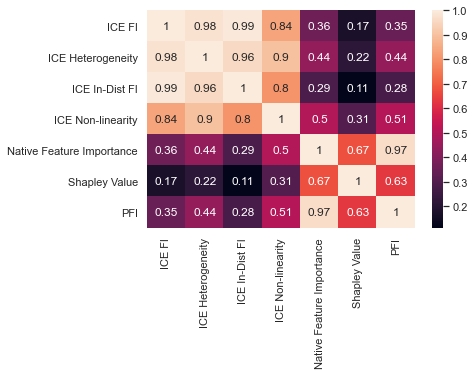

In [197]:
norm_vals = comparator\
    .build_normalized_table()\
    .iloc[:,1:]\

corr_matrix = norm_vals\
    .pipe(np.corrcoef, rowvar = False)

sn.heatmap(corr_matrix, 
           annot = True,
           yticklabels = norm_vals.columns,
           xticklabels = norm_vals.columns)

plt.xticks(rotation=90)

# To show 1

In [198]:
def head_and_tail(df, k):
    return df.head(k).append(df.tail(k))

In [199]:
results = comparator\
    .build_normalized_table()\
    .loc[:,['Feature', 'ICE FI', 'Native Feature Importance']]\
    .assign(Difference = lambda x:x['ICE FI'] - x['Native Feature Importance'])\
    .sort_values('Difference', ascending = False)\
    .pipe(head_and_tail, k = 2)\
    .reset_index(drop = True)\
    .round(1)

In [200]:
results

,Feature,ICE FI,Native Feature Importance,Difference
0,STDs:molluscum contagiosum,9.8,0.1,9.6
1,STDs:pelvic inflammatory disease,8.9,0.1,8.8
2,Number of sexual partners,1.0,9.9,-8.9
3,Age,3.4,17.8,-14.3


In [201]:
caption = 'Feature impact table for features in cervical cancer dataset with two largest and most negative difference between Random Forest feature importance and ICE Feature Impact.'
label = 'tab:fi_diffs'
column_format = r'm{4.5cm}>{\centering\arraybackslash}m{1.5cm}>{\centering\arraybackslash}m{1.5cm}>{\centering\arraybackslash}m{1.5cm}'

print(results.to_latex(index = False,
                      caption = caption,
                      label = label,
                      column_format = column_format))

\begin{table}
\centering
\caption{Feature impact table for features in cervical cancer dataset with two largest and most negative difference between Random Forest feature importance and ICE Feature Impact.}
\label{tab:fi_diffs}
\begin{tabular}{m{4.5cm}>{\centering\arraybackslash}m{1.5cm}>{\centering\arraybackslash}m{1.5cm}>{\centering\arraybackslash}m{1.5cm}}
\toprule
                          Feature &  ICE FI &  Native Feature Importance &  Difference \\
\midrule
       STDs:molluscum contagiosum &     9.8 &                        0.1 &         9.6 \\
 STDs:pelvic inflammatory disease &     8.9 &                        0.1 &         8.8 \\
        Number of sexual partners &     1.0 &                        9.9 &        -8.9 \\
                              Age &     3.4 &                       17.8 &       -14.3 \\
\bottomrule
\end{tabular}
\end{table}



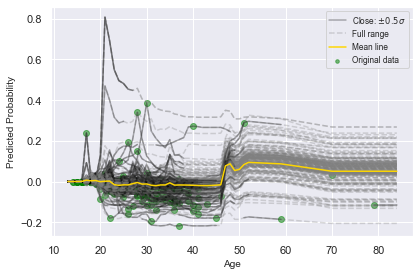

In [202]:
ice.ice_plot_single_feature('Age', mode = 'c-ice')

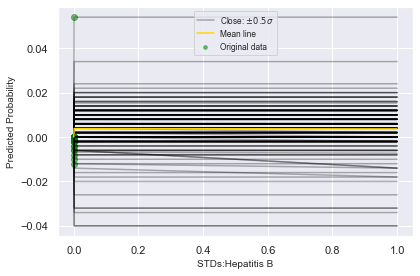

In [203]:
ice.ice_plot_single_feature('STDs:Hepatitis B', mode = 'c-ice')

# To show 2

In [204]:
results

,Feature,ICE FI,Native Feature Importance,Difference
0,STDs:molluscum contagiosum,9.8,0.1,9.6
1,STDs:pelvic inflammatory disease,8.9,0.1,8.8
2,Number of sexual partners,1.0,9.9,-8.9
3,Age,3.4,17.8,-14.3


In [205]:
temp2 = comparator\
    .build_raw_table()\
    .loc[:,['Feature','ICE Heterogeneity','ICE Non-linearity']]

results2 = results\
    .merge(temp2, how = "left", on = "Feature")\
    .drop(['Native Feature Importance', 'Difference'], axis = 1)\
    .rename({'ICE FI':'Feature Impact',
             'ICE Heterogeneity':'Heterogeneity',
             'ICE Non-linearity':'Non-Linearity'}, axis = 1)\
    .round(2)

results2

,Feature,Feature Impact,Heterogeneity,Non-Linearity
0,STDs:molluscum contagiosum,9.8,0.27,0.19
1,STDs:pelvic inflammatory disease,8.9,0.23,0.17
2,Number of sexual partners,1.0,0.05,0.04
3,Age,3.4,0.11,0.18


In [206]:
caption = 'Feature impact table for features in cervical cancer dataset with two largest and most negative difference between Random Forest feature importance and ICE Feature Impact.'
label = 'tab:het_and_non-lin'
column_format = r'm{4.5cm}>{\centering\arraybackslash}m{2cm}>{\centering\arraybackslash}m{2cm}>{\centering\arraybackslash}m{2cm}'

print(results2.to_latex(index = False,
                      caption = caption,
                      label = label,
                      column_format = column_format))

\begin{table}
\centering
\caption{Feature impact table for features in cervical cancer dataset with two largest and most negative difference between Random Forest feature importance and ICE Feature Impact.}
\label{tab:het_and_non-lin}
\begin{tabular}{m{4.5cm}>{\centering\arraybackslash}m{2cm}>{\centering\arraybackslash}m{2cm}>{\centering\arraybackslash}m{2cm}}
\toprule
                          Feature &  Feature Impact &  Heterogeneity &  Non-Linearity \\
\midrule
       STDs:molluscum contagiosum &             9.8 &           0.27 &           0.19 \\
 STDs:pelvic inflammatory disease &             8.9 &           0.23 &           0.17 \\
        Number of sexual partners &             1.0 &           0.05 &           0.04 \\
                              Age &             3.4 &           0.11 &           0.18 \\
\bottomrule
\end{tabular}
\end{table}



# is het/non-lin related to diff?

In [207]:
check = comparator\
    .build_normalized_table()\
    .assign(Difference = lambda x:x['ICE FI'] - x['Native Feature Importance'])\
    .sort_values('Difference', ascending = False)

In [208]:
np.corrcoef(check[['Difference', 'ICE Heterogeneity', 'ICE Non-linearity']], rowvar = False)

array([[1.        , 0.34580183, 0.17736405],
       [0.34580183, 1.        , 0.9021686 ],
       [0.17736405, 0.9021686 , 1.        ]])

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
y = check['Difference']
X = check[['ICE Heterogeneity', 'ICE Non-linearity']]

lr = LinearRegression()
lr.fit(X, y)
lr.score(X, y)

0.2169457935567406

In [211]:
from sklearn.tree import DecisionTreeRegressor

In [212]:
rt = DecisionTreeRegressor(max_depth = 3)
rt.fit(X, y)
rt.score(X, y)

0.9098910660380768

In [213]:
0.48**0.5

0.6928203230275509

# appendix all results

In [214]:
appendix_tab1 = comparator.build_normalized_table()\
    .drop(['ICE Heterogeneity', 'ICE Non-linearity'], axis = 1)\
    .round(1)\
    .rename({'ICE FI':'ICE',
             'ICE In-Dist FI':r'ICE ID ($\lambda = 0.75$)',
             'Native Feature Importance':'Random Forest',
             'Shapley Value':'Tree SHAP',
             'PFI':'Permutation'}, axis = 1)

trunc = 30
appendix_tab1['Feature'] = appendix_tab1['Feature']\
    .apply(lambda x:np.where(len(x) > trunc, x[:(trunc-3)]+'...',x))

appendix_tab1.head(3)

,Feature,ICE,ICE ID ($\lambda = 0.75$),Random Forest,Tree SHAP,Permutation
0,Age,3.4,2.6,17.8,11.3,13.3
1,Number of sexual partners,1.0,1.1,9.9,6.3,9.9
2,First sexual intercourse,16.9,16.9,12.3,7.2,12.1


In [215]:
appendix_tab1['Feature']

0                                Age
1          Number of sexual partners
2           First sexual intercourse
3                 Num of pregnancies
4                             Smokes
5                     Smokes (years)
6                Smokes (packs/year)
7            Hormonal Contraceptives
8     Hormonal Contraceptives (ye...
9                                IUD
10                       IUD (years)
11                              STDs
12                     STDs (number)
13               STDs:condylomatosis
14      STDs:cervical condylomatosis
15       STDs:vaginal condylomatosis
16    STDs:vulvo-perineal condylo...
17                     STDs:syphilis
18    STDs:pelvic inflammatory di...
19               STDs:genital herpes
20        STDs:molluscum contagiosum
21                         STDs:AIDS
22                          STDs:HIV
23                  STDs:Hepatitis B
24                          STDs:HPV
25         STDs: Number of diagnosis
26    STDs: Time since first diag...
2

In [216]:
label = 'app:all_fi'
caption =  'Feature impact table for all features in cervical cancer dataset. All feature impact/importance metrics have been made positive and normalized to sum to 100.'
column_format = 'm{4.5cm}'+r'>{\centering\arraybackslash}m{1.5cm}'*5

print(appendix_tab1.to_latex(index = False,
                      label = label,
                      caption = caption,
                      column_format = column_format))

\begin{table}
\centering
\caption{Feature impact table for all features in cervical cancer dataset. All feature impact/importance metrics have been made positive and normalized to sum to 100.}
\label{app:all_fi}
\begin{tabular}{m{4.5cm}>{\centering\arraybackslash}m{1.5cm}>{\centering\arraybackslash}m{1.5cm}>{\centering\arraybackslash}m{1.5cm}>{\centering\arraybackslash}m{1.5cm}>{\centering\arraybackslash}m{1.5cm}}
\toprule
                        Feature &   ICE &  ICE ID (\$\textbackslash lambda = 0.75\$) &  Random Forest &  Tree SHAP &  Permutation \\
\midrule
                            Age &   3.4 &                        2.6 &           17.8 &       11.3 &         13.3 \\
      Number of sexual partners &   1.0 &                        1.1 &            9.9 &        6.3 &          9.9 \\
       First sexual intercourse &  16.9 &                       16.9 &           12.3 &        7.2 &         12.1 \\
             Num of pregnancies &   1.3 &                        1.4 &          

# appendix-het and nl

In [217]:
appendix_tab2 = comparator.build_raw_table()\
    .loc[:,['Feature','ICE FI', 'ICE Heterogeneity', 'ICE Non-linearity']]\
    .round(2)\
    .rename({'ICE FI':'ICE Feature Impact',
             'ICE Non-linearity':'ICE Non-Linearity'}, axis = 1)

trunc = 30
appendix_tab2['Feature'] = appendix_tab1['Feature']\
    .apply(lambda x:np.where(len(x) > trunc, x[:(trunc-3)]+'...',x))

appendix_tab2.sort_values('ICE Heterogeneity', ascending = False).head(10)

,Feature,ICE Feature Impact,ICE Heterogeneity,ICE Non-Linearity
2,First sexual intercourse,0.38,0.59,1.63
8,Hormonal Contraceptives (ye...,0.20,0.34,0.47
6,Smokes (packs/year),0.16,0.32,0.60
20,STDs:molluscum contagiosum,0.22,0.27,0.19
18,STDs:pelvic inflammatory di...,0.20,0.23,0.17
19,STDs:genital herpes,0.15,0.18,0.13
23,STDs:Hepatitis B,0.13,0.17,0.11
24,STDs:HPV,0.12,0.14,0.10
10,IUD (years),0.08,0.12,0.28
15,STDs:vaginal condylomatosis,0.08,0.11,0.07


In [218]:
label = 'app:fi_deriv'
caption =  'Heterogeneity and non-linearity dimensions for all features in cervical cancer dataset.'
column_format = 'm{4.5cm}'+r'>{\centering\arraybackslash}m{2cm}'*3

print(appendix_tab2.to_latex(index = False,
                      label = label,
                      caption = caption,
                      column_format = column_format))

\begin{table}
\centering
\caption{Heterogeneity and non-linearity dimensions for all features in cervical cancer dataset.}
\label{app:fi_deriv}
\begin{tabular}{m{4.5cm}>{\centering\arraybackslash}m{2cm}>{\centering\arraybackslash}m{2cm}>{\centering\arraybackslash}m{2cm}}
\toprule
                        Feature &  ICE Feature Impact &  ICE Heterogeneity &  ICE Non-Linearity \\
\midrule
                            Age &                0.08 &               0.11 &               0.18 \\
      Number of sexual partners &                0.02 &               0.05 &               0.04 \\
       First sexual intercourse &                0.38 &               0.59 &               1.63 \\
             Num of pregnancies &                0.03 &               0.05 &               0.07 \\
                         Smokes &                0.03 &               0.04 &               0.02 \\
                 Smokes (years) &                0.04 &               0.06 &               0.12 \\
            Smoke